# Hopfield Network Demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from alnum_dataset import generate_alnum_dataset
from hopfield import HopfieldNetwork
from utils import *

In [2]:
# Learning method: 'hebbian', 'storkey', 'centered', 'damped'
LEARNING_METHOD = 'storkey'
 # Damping factor for damped pseudoinverse training 
LAM = 0.1                    

In [3]:
# Load dataset
X, y = generate_alnum_dataset()

print(f"Dataset shape: {X.shape}")
print(f"Data unique values: {np.unique(X)}")
print(f"Labels: {y}")

Dataset shape: (36, 28, 28)
Data unique values: [-1  1]
Labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Select patterns to store

In [4]:
# Prepare data for Hopfield Network
Patterns = X.reshape(len(X), -1)            # Reshape to (num_patterns, num_features)
num_samples, num_features = Patterns.shape  # get number of samples and features

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 36
Number of features: 784


## Train Hopfield network

First, we show just one 

In [5]:
# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(
    n_neurons=num_features, 
    learning_method=LEARNING_METHOD, damped_lam=LAM
)

# Train Hopfield Network
hopfield_net.memorize(Patterns[0:1], labels=y[0:1]) 

# Check stability of stored patterns
print_stability_status(hopfield_net)

Pattern A: Stable (margin = 0.998724)


## Weights of the Hopfield networks

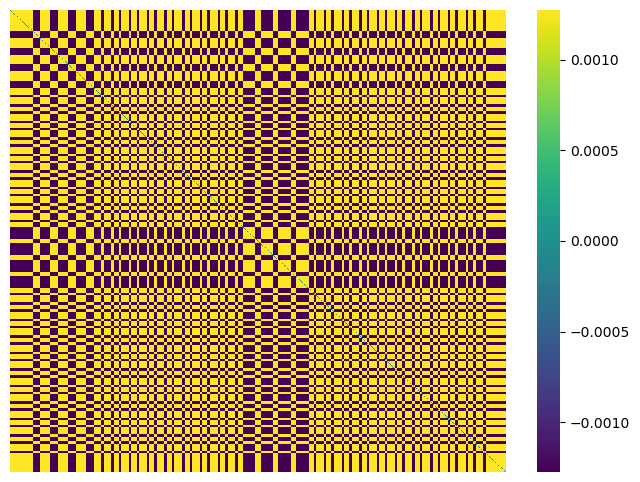

In [6]:
# Weights of the trained Hopfield Network
plot_weight_matrix(hopfield_net)

## Test Hopfield Network

In [7]:
print(f"Number of stored patterns: {hopfield_net.num_memories()}")

Number of stored patterns: 1


### Stored patterns

Converged after 1 iterations.


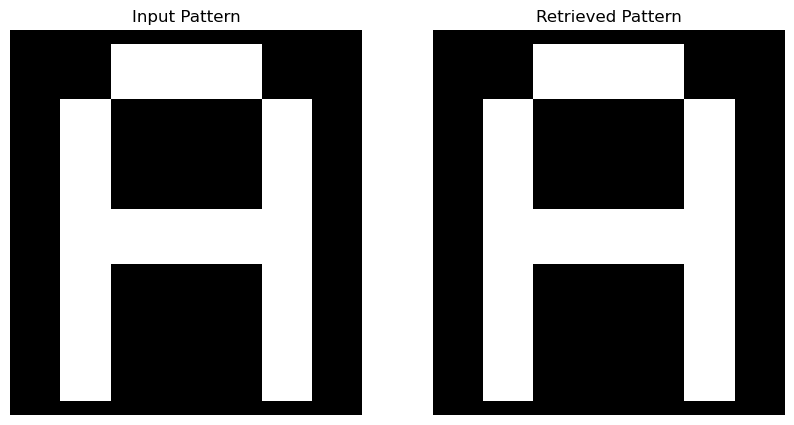

In [8]:
inp = hopfield_net.memories[0].copy()
out = hopfield_net.retrieve(inp, max_iterations=1000)
compare_patterns(inp, out)

### Noisy patterns

Converged after 2 iterations.


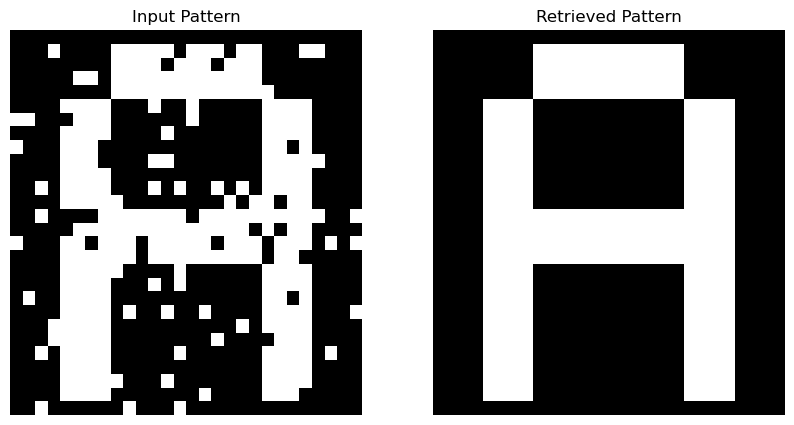

In [9]:
inp = add_noise(hopfield_net.memories[0], p=0.1)
out, history = hopfield_net.retrieve(inp, history=True)
compare_patterns(inp, out)

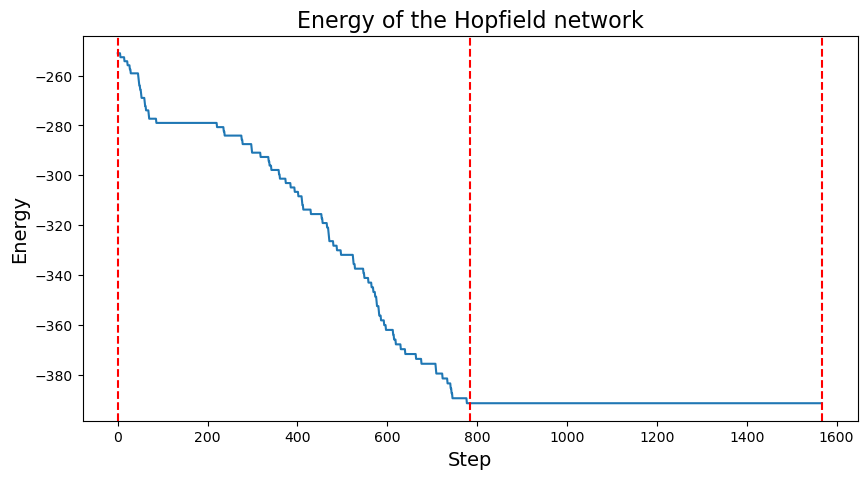

In [10]:
plot_energy(history)

### Incomplete patterns

Converged after 2 iterations.


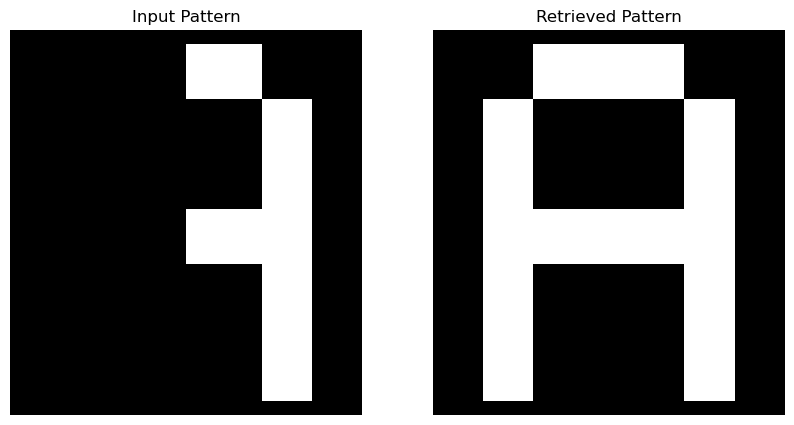

In [11]:
inp = hide_pattern(hopfield_net.memories[0])
out = hopfield_net.retrieve(inp)
compare_patterns(inp, out)

### Synchronous updates

Converged after 2 iterations.


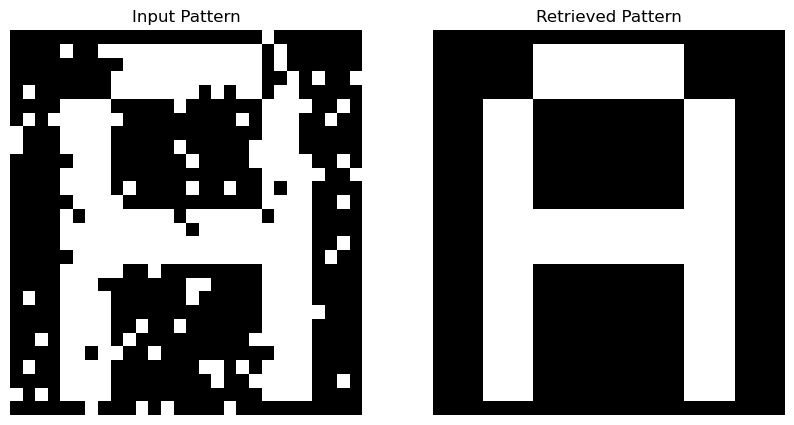

In [12]:
inp = add_noise(hopfield_net.memories[0], p=0.1)
out, history = hopfield_net.retrieve(inp, history=True, update_rule="sync")
compare_patterns(inp, out)

In [13]:
pd.DataFrame(history)

,iteration,energy
0,0,-251.020408
1,1,-391.500000
2,2,-391.500000


***

Now, we test how the result is influence by when more patterns are stored in the memory.

In [14]:
hopfield_net.memorize(Patterns[1:2], labels=y[1:2])
print_stability_status(hopfield_net)

Pattern A: Stable (margin = 0.691011)
Pattern B: Stable (margin = 0.694968)


In [15]:
hopfield_net.memorize(Patterns[2:3], labels=y[2:3])
print_stability_status(hopfield_net)

Pattern A: Stable (margin = 0.485147)
Pattern B: Stable (margin = 0.377893)
Pattern C: Stable (margin = 0.836117)


Converged after 1 iterations.


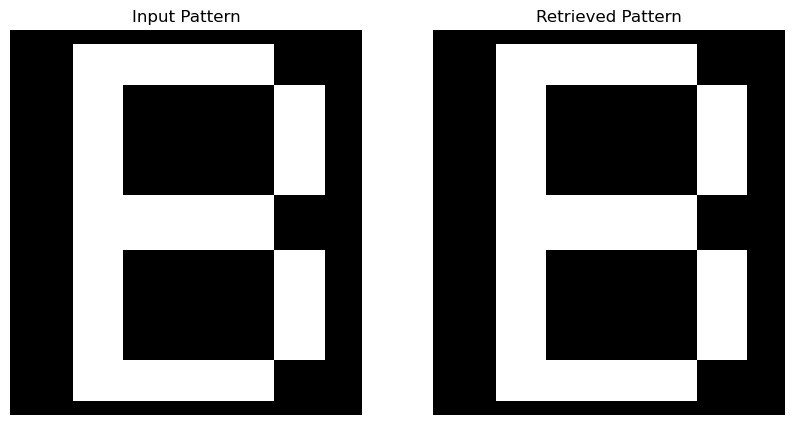

In [16]:
inp = hopfield_net.memories[1].copy()
out, history = hopfield_net.retrieve(inp, max_iterations=1000, history=True)
compare_patterns(inp, out)

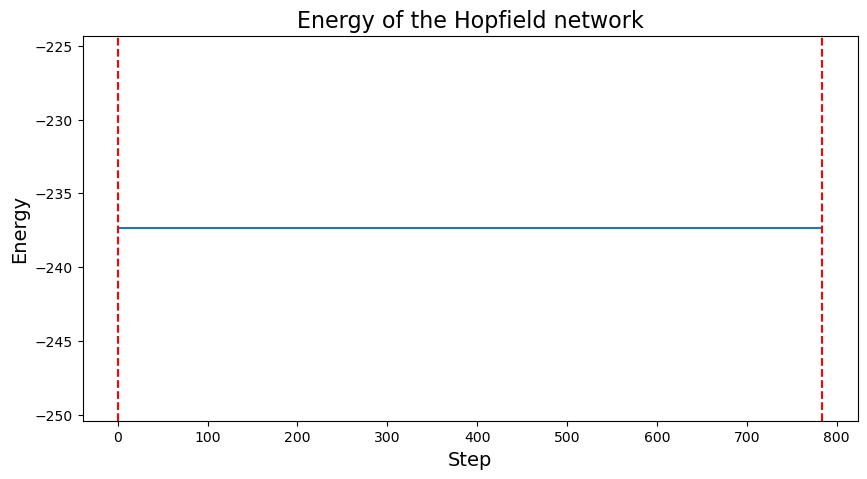

In [17]:
plot_energy(history)